In [1]:
###Author: Sobha B###

#import required libraries#
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
import numpy as np
sns.set()#it overwrites the matplotlib functinality

      PRICE  HEIGHT  WIDTH  SIGNED  PICTURE  HOUSE 
0  3.993780    21.3   25.6       1        1       1
1  8.800000    31.9   25.6       1        2       2
2  0.131694     6.9   15.9       0        3       3
3  2.037500    25.7   32.0       1        4       2
4  1.487500    25.7   32.0       1        4       2


C:\Users\19402\anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


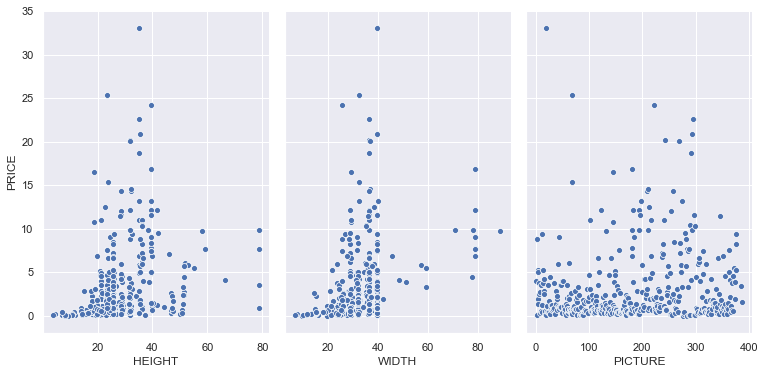

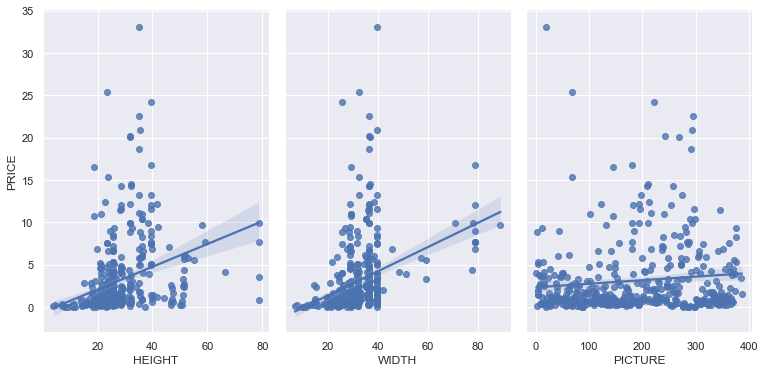

In [2]:
#import csv file#
data=pd.read_csv('monet.csv')
X1=DataFrame(data,columns=['HEIGHT'])
X2=DataFrame(data,columns=['WIDTH'])
X3=DataFrame(data,columns=['SIGNED'])
X4=DataFrame(data,columns=['PICTURE'])
X5=DataFrame(data,columns=['HOUSE'])

a=data['HEIGHT']
b=data.WIDTH

X=data.HEIGHT*data.WIDTH
X6=np.log(X)

y=DataFrame(data,columns=['PRICE'])
print(data.head(5))
sns.pairplot(data, x_vars=['HEIGHT','WIDTH','PICTURE'],y_vars='PRICE',size=5,aspect=0.7)
sns.pairplot(data, x_vars=['HEIGHT','WIDTH','PICTURE'],y_vars='PRICE',size=5,aspect=0.7,kind='reg')


Text(0.5, 0, 'PRICE')

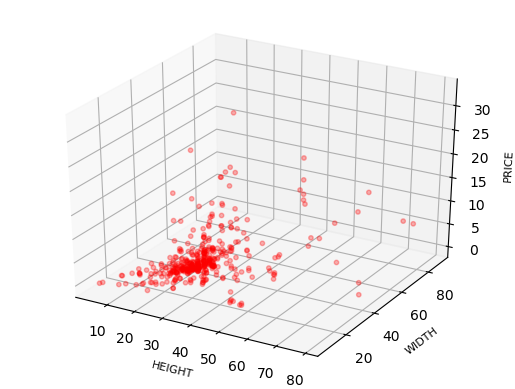

In [10]:
from mpl_toolkits.mplot3d import axes3d
fig = plt.figure('Multivariate Regression')
ax = plt.subplot(111, projection = '3d')

# plot dataset
ax.scatter(
    data['HEIGHT'],
    data['WIDTH'],
    data[['PRICE']],
    color = 'red',
    marker = 'o',
    s = 10,alpha=0.3
)
ax.set_xlabel('HEIGHT', fontsize=8)
ax.set_ylabel('WIDTH', fontsize=8)
ax.set_zlabel('PRICE', fontsize=8)
#ax = plt.subplot(111, projection = '3d')
#ax.plot(data['HEIGHT'], data['WIDTH'], lreg.predict(data[['HEIGHT', 'WIDTH']]),lw=1, color='red',label='Regression Line')

In [4]:
#create linear regression model object
lreg = LinearRegression()

lreg.fit(data[['HEIGHT','WIDTH']],data['PRICE'])
print('HEIGHT, WIDTH Co-efficient: ',lreg.coef_)
print('Intercept: ',lreg.intercept_)
print(lreg.predict([[21.3,25.6]]))
print('Price Predictions:',lreg.predict(data[['HEIGHT','WIDTH']]))

HEIGHT, WIDTH Co-efficient:  [0.08005639 0.10408311]
Intercept:  -2.465574773797319
[1.90415394]
Price Predictions: [ 1.90415394  2.7527517  -0.25826426  2.92253395  2.92253395  2.90412
  3.28122186  3.18594202  3.35167736  3.37249399  3.37249399  3.35167736
  4.18909858  2.74400722  1.69760257  2.94169655  3.3228551   3.68474331
  3.35167736  1.83766697  2.25563383  2.99859242  2.99859242  3.05685824
  2.27644066  4.4372734   4.62940874  2.55018846  2.55018846  3.38049962
  3.39090794  1.95139015  2.90412     3.59985218  1.89853138  1.88011743
  2.92971258  3.48933909  2.92253395  1.90415394  2.90412     2.72639089
  2.41094127  2.57660805  1.44299777  2.70237397  2.3380831   1.92497056
  1.92497056  0.54469255  5.6413098   1.9361765   2.76641909  3.51099252
  3.51099252  3.44847409  3.41492485  2.89130902  2.90412     2.9409479
  2.87529774  3.93291813  2.93614256  2.74400722  2.56306801  2.45257452
  2.52376887  5.2762213   1.74242631  1.74242631  3.68474331  2.77425819
  2.79267214

R^2 Score for Multi Linear Regression: 0.14657565268792405


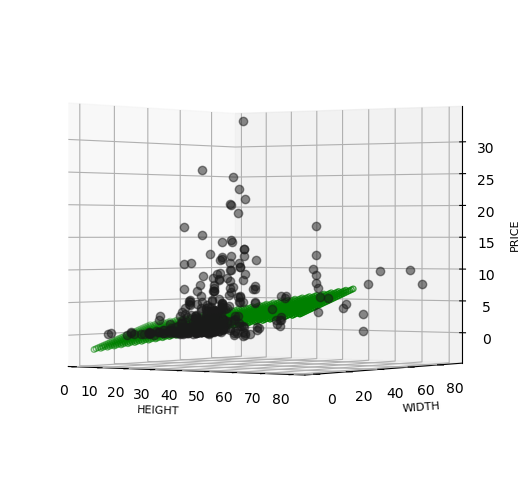

In [11]:
from mpl_toolkits.mplot3d import Axes3D
X = data[['HEIGHT', 'WIDTH']].values.reshape(-1,2)
Y = data['PRICE']
x = X[:, 0]
y = X[:, 1]
z = Y
x_pred = np.linspace(3, 79, 30)   # range of porosity values
y_pred = np.linspace(0.01, 33.02, 30)  # range of brittleness values
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T
reg = lreg.fit(X, Y)
predicted = reg.predict(model_viz)
plt.style.use('default')
fig = plt.figure(figsize=(22, 6))
ax = fig.add_subplot(132, projection='3d')
ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=15, edgecolor='green')
ax.set_xlabel('HEIGHT', fontsize=8)
ax.set_ylabel('WIDTH', fontsize=8)
ax.set_zlabel('PRICE', fontsize=8)
ax.view_init(elev=0, azim=-55)
#fig.tight_layout()
#fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)
r2 = reg.score(X, Y)
print('R^2 Score for Multi Linear Regression:',r2)

In [6]:
#split the data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=0)

#create and fit the model
lreg = LinearRegression()
lreg.fit(X_train,y_train)

#find the coefficients
print('Size(X) Coefficient: ',lreg.coef_)
print('Intercept: ',lreg.intercept_)


Size(X) Coefficient:  [0.05937611 0.1305315 ]
Intercept:  -2.7928156247015283


In [7]:
#test r2 score
print('R^2 Score for Linear Regression:', lreg.score(X_test,y_test))
print('R^2 Score for Linear Regression:', r2_score(y_test,lreg.predict(X_test)))

#test the predictions
print('Price Predictions:',lreg.predict([[21.3,25.6]]))
pred=lreg.predict(X_test)
print('Prediction of Price for X_test values:', pred)

R^2 Score for Linear Regression: 0.08327458062793448
R^2 Score for Linear Regression: 0.08327458062793447
Price Predictions: [1.81350214]
Prediction of Price for X_test values: [ 3.87015419  1.78470416  3.58661461  1.56657426  3.47855968  2.43067791
 -0.32966634  2.89116791  2.07918091 12.26236532  2.99323726  4.68954457
  3.72361144  3.36461511  2.33803198  4.39242413  3.45245338  2.70121231
  3.45245338  3.8265229   4.0343393   3.90813572  2.77241568  2.44288895
  3.36254709  0.51246703  2.95883749  3.58430673  1.14764754  4.24422371
  2.6381585   3.10879152  3.69349162  3.15129286  2.89828345  9.8194327
  2.8852303   3.20492326 10.40853012  1.50964994  2.2181498   2.705972
  2.88820981  5.18354425  2.64702765  2.35471486  2.859124    7.81340498
  2.89116791  2.2181498   3.72361144  0.25173984  3.36819686  2.2703624
  2.12314802  2.79616612  4.68954457  3.5165412   3.63651933  1.50964994
  3.75140196  2.92914943  2.90126296  3.92520239  0.87607913  2.40692747
  1.22743221  3.92001094

In [8]:
#cross validation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
scores=cross_val_score(lreg, X_train, y_train, cv=10)
print(scores.mean())

0.15403818872115824


In [9]:
#loss functions
print('MSE for Linear Regression:', mse(y_test,pred))
print('RMSE for Linear Regression:', np.sqrt(mse(y_test,pred)))
print('MAE for Linear Regression:', mae(y_test,pred))

MSE for Linear Regression: 16.599465917642423
RMSE for Linear Regression: 4.074244214285936
MAE for Linear Regression: 2.6945903397113726
